### Student Information
Name:
IUAN KAI FANG
Student ID:
108003854
GitHub ID:
s108003854

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

# First Part

### Exercise 2

In [ ]:
import numpy as np
# swap column values
X[['category', 'text']] = X[['text', 'category']]
# generate dataFrame with specific index
dfl = pd.DataFrame(np.random.randn(5, 4),columns=list('ABCD'),index=list('abcde'))
# Selection by label
dfl.loc['a':'d']
#Accessing via label slices:
dfl.loc['a':'d','A':'C']

#For getting values with a boolean array:
dfl>0
dfl.loc[:, dfl.loc['a'] > 0]

# Slicing with labels
s = pd.Series(list('abcde'), index=[0, 3, 2, 5, 4])
s[2:5]
s.sort_index()
s[2:5]


# Selection by callable
dfl.loc[lambda df: df['A'] > 0, :]
dfl.iloc[:, lambda df: [0, 1]]
dfl[lambda df: df.columns[0]]
# callable indexing in Series
dfl['A'].loc[lambda s: s > 0]

# masking
dfl[dfl<0]
dfl.mask(dfl >= 0)
# where takes an optional other argument for replacement of values where the condition is False
dfl.where(dfl<0,0)
# set values based on some boolean criteria
dfl[dfl < 0] = 0
# parameter inplace so that the original data can be modified without creating a copy
#dfl.where(dfl<0,0,inplace=True)

# query method
df = pd.DataFrame(np.random.rand(10, 3), columns=list('abc'))
df[(df['a'] < df['b']) & (df['b'] < df['c'])]
df.query('(a < b) & (b < c)')
df.query('a < b < c')

### Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
$Hint$ : why .isnull() didn't work?

In [ ]:

# Answer here
''''
It's fuzzy to check for missing values by dataFrame form.
The data of column missing_expample in id C and D is the text of None and NaN.
The data of column missing_expample in id A is Nan.
The data of column missing_expample in id B is missing.
The data of column missing_expample in id E is None.
The data of column missing_expample in id F is the text without any characters.
''''''

### Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

In [ ]:
two_dist = pd.concat([X.category_name.value_counts(),X_sample.category_name.value_counts()],axis=1)
two_dist.plot(kind = 'bar', title = 'Category distribution', ylim = [0,650],rot = 0, fontsize = 12, figsize = (8,5))

### Exercise 9
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [ ]:
analyze(' '.join(list(X[:1].text)))

### Exercise 10
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Here 4 stands for '1', get_feature_names() will help us to collect the feature name
combine_arr = list(zip(X_counts[4,0:].toarray()[0],count_vect.get_feature_names()[0:]))
# Push the word into new_arr where the first word is '1'
new_arr = []
for i in range(len(combine_arr)):
    if(combine_arr[i][0] == 1):
        new_arr.append(combine_arr[i][1])
print(new_arr)

### Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# we can randomly selcet 20 article and 20 terms to plot.
term_arr = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
size = 20
def getRndArr(arr_size,size):
    rand_index = []
    for i in range(size):
        rand = np.random.randint(0,arr_size)
        if rand not in rand_index:
            rand_index.append(rand)
    return rand_index

rand_index = getRndArr(len(count_vect.get_feature_names()),size)
rand_index2 = getRndArr(len(list(X.index)),size)
plot_x = ["term_"+str(i) for i in rand_index[0:20]]
plot_y = ["doc_"+ str(i) for i in rand_index2[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
x,y,z = X_reduced[:,0],X_reduced[:,1],X_reduced[:,2]
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d') # 111畫在整個畫布。
ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
import plotly.graph_objs as go
df = pd.DataFrame({'x': count_vect.get_feature_names()[:300],'y': term_frequencies[:300]})
#df['x']
fig = go.Figure([go.Bar(x=df['x'], y=df['y'])])
fig.layout.xaxis.type = 'category'
fig.show()

### Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [ ]:
# take 100 for example
import plotly.graph_objs as go
sample = 100
fig = go.Figure([go.Bar(x=count_vect.get_feature_names()[:sample], y=term_frequencies[:sample])])
fig.layout.xaxis.type = 'category'
fig.show()

### Exercise 15
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [ ]:
index = np.argsort(-term_frequencies)
term_frequencies[index]
x_vect = np.asarray(count_vect.get_feature_names())
y_vect = term_frequencies
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=x_vect[index[:1000]], 
            y=term_frequencies[index[:1000]])
g.set_xticklabels(count_vect.get_feature_names()[:1000], rotation = 90);

### Exercise 16
Try to generate the binarization using the category_name column instead. Does it work?

In [ ]:
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

# Second Part:
### New dataSet

In [10]:
import pandas as pd
import helpers.data_mining_helpers as dmh
# impart new dataset
filepath_dict = {'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt',
                 'yelp':   'yelp_labelled.txt', }
df_list = []

for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'score'], sep='\t')
    df['source'] = source
    df_list.append(df)
    
# Concat all in one dataframe
df = pd.concat(df_list)
# Here to split every dataframes
df_amazon = df[df['source'] == 'amazon']
df_imdb = df[df['source'] == 'imdb']
df_yelp = df[df['source'] == 'yelp']

df

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [11]:
# 4. Data Mining using Pandas
df.isnull().apply(lambda x: dmh.check_missing_values(x))
df.drop_duplicates(keep=False, inplace=True)

<AxesSubplot:title={'center':'Category distribution'}>

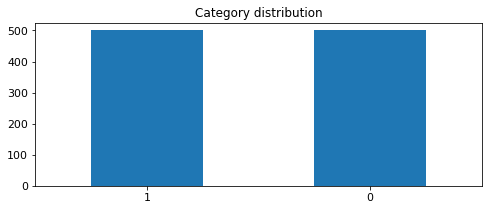

In [12]:
# 5.1 Sampling
df_sample = df.sample(n=1000)
df_amazon.score.value_counts().plot(kind = 'bar', title = 'Category distribution', rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot:title={'center':'Category distribution'}>

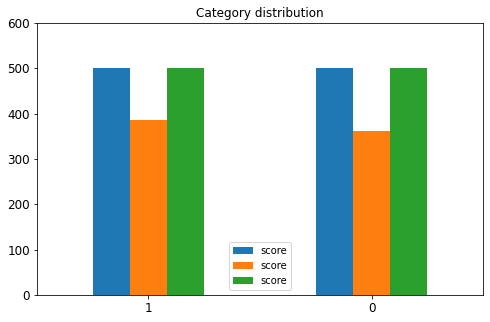

In [13]:
# 5.2 Feature Creation
three_dist = pd.concat([df_amazon.score.value_counts(),df_imdb.score.value_counts(),df_yelp.score.value_counts()],axis=1)
three_dist.plot(kind = 'bar', title = 'Category distribution', ylim = [0,600],rot = 0, fontsize = 12, figsize = (8,5))

In [14]:
df['words'] = df.sentence.apply(lambda x: dmh.tokenize_text(x))
df['words']


0      [So, there, is, no, way, for, me, to, plug, it...
1                   [Good, case, ,, Excellent, value, .]
2                          [Great, for, the, jawbone, .]
3      [Tied, to, charger, for, conversations, lastin...
4                               [The, mic, is, great, .]
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: words, Length: 2714, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# 5.3 Feature Subset Selection
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)
analyze = count_vect.build_analyzer()
print(analyze(' '.join(list(df[0:1].sentence))))
print(df_counts.shape)
print(count_vect.get_feature_names()[0:10])

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']
(2714, 5153)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']


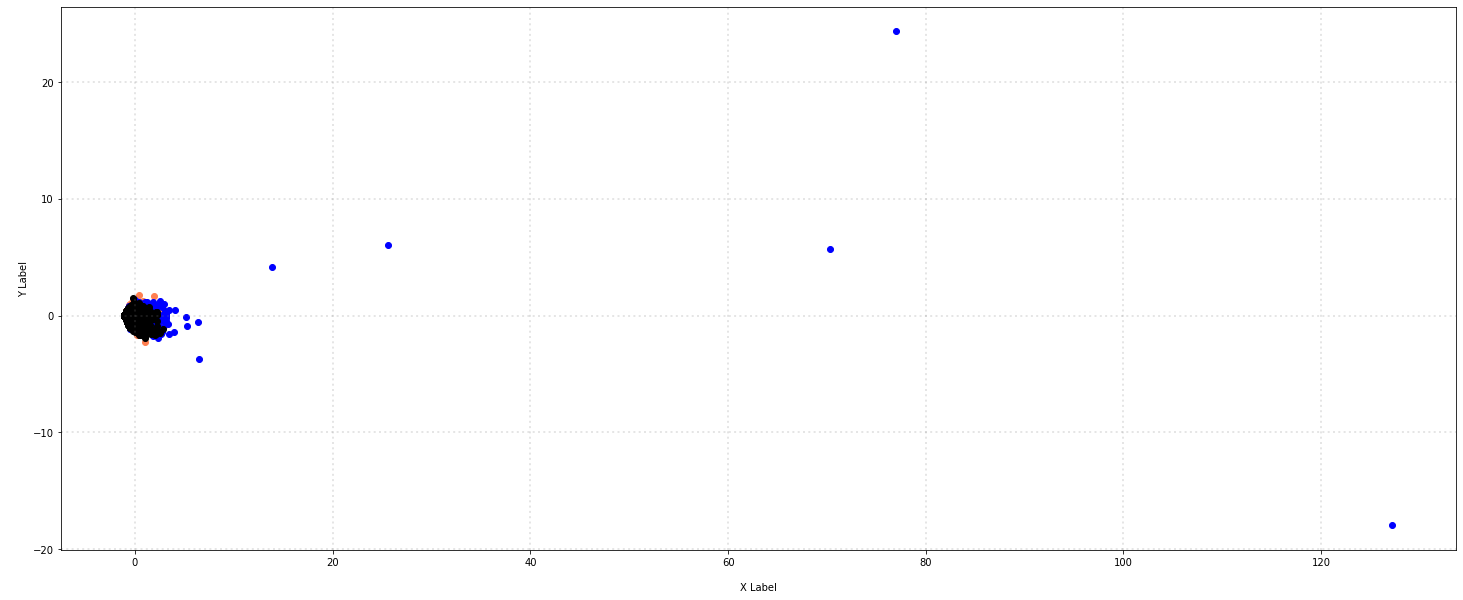

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 5.4 Dimensionality Reduction
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
col = ['coral', 'blue', 'black']
categories=['amazon','imdb','yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['source'] == category].T[0]
    ys = df_reduced[df['source'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

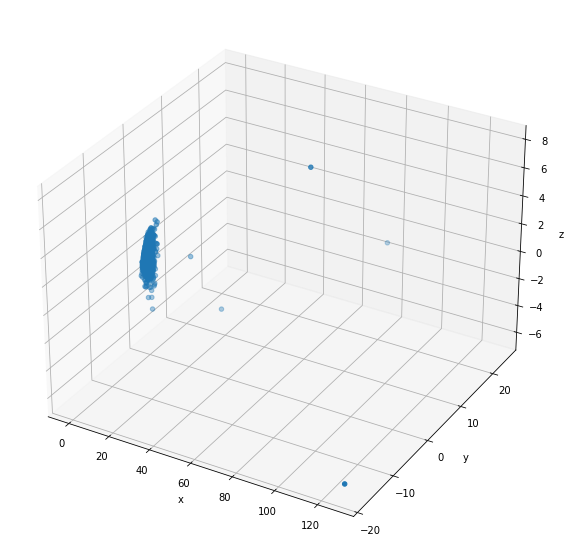

In [25]:
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
x,y,z = df_reduced[:,0],df_reduced[:,1],df_reduced[:,2]
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d') # 111就是整個畫布。
ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


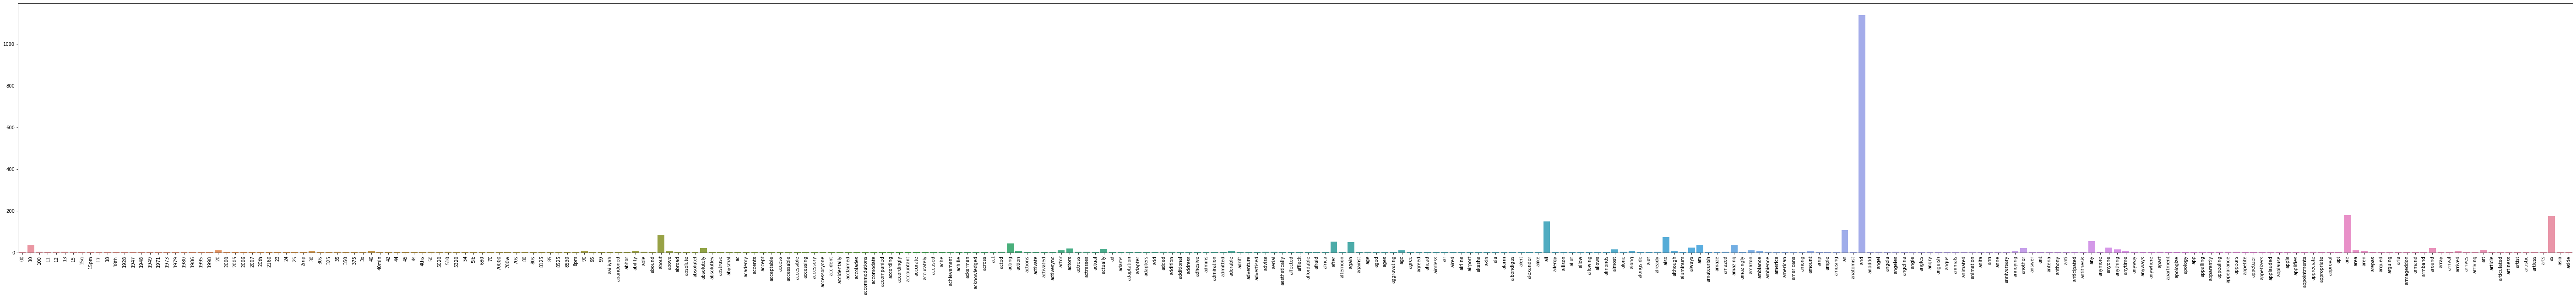

In [28]:
import numpy as np
import seaborn as sns
# 5.5 Atrribute Transformation / Aggregation
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90)

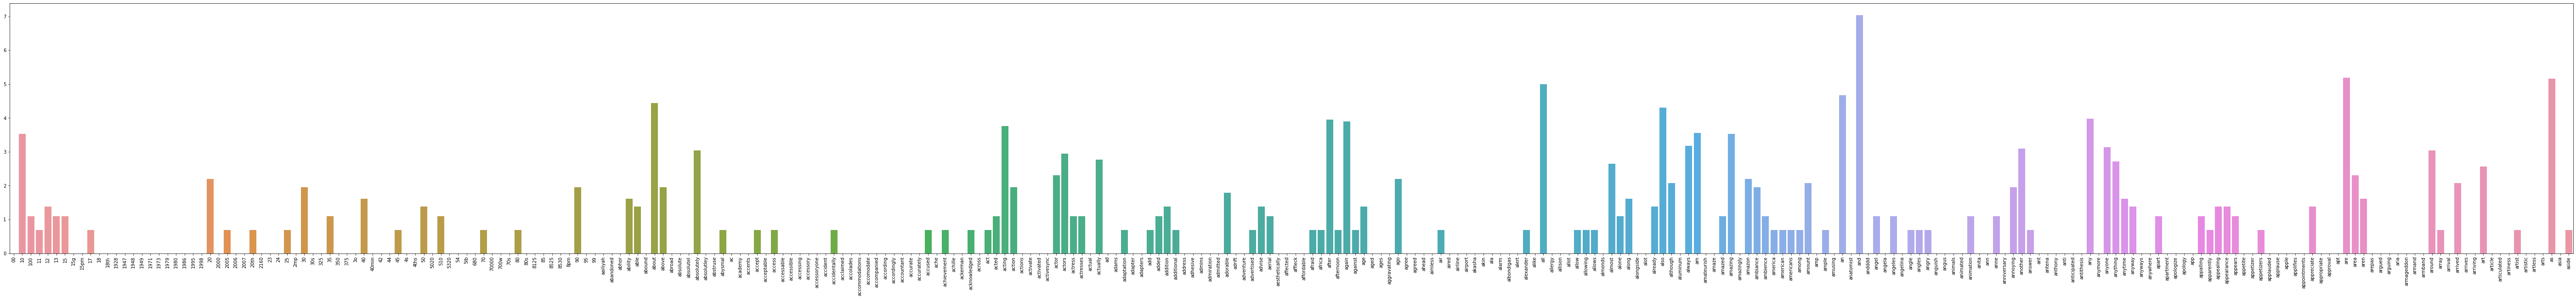

In [34]:
import plotly.graph_objs as go
import math
dff = pd.DataFrame({'x': count_vect.get_feature_names()[:300],'y': term_frequencies[:300]})
fig = go.Figure([go.Bar(x=dff['x'], y=dff['y'])])
fig.layout.xaxis.type = 'category'
fig.show()
sample = 100
fig = go.Figure([go.Bar(x=count_vect.get_feature_names()[:sample], y=term_frequencies[:sample])])
fig.layout.xaxis.type = 'category'
fig.show()
dff = pd.DataFrame({'x': count_vect.get_feature_names()[:300],'y': term_frequencies[:300]})
# sort in frequency
dff = dff.sort_values(by=['y'], ascending=False, na_position='first')
fig = go.Figure([go.Bar(x=dff['x'],y=dff['y'])])
fig.layout.xaxis.type = 'category'
fig.show()
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [35]:
# 5.6 Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.source)
mlb.classes_
df['bin_source'] = mlb.transform(df['source']).tolist()
df

,sentence,score,source,words,bin_source
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
996,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
997,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
998,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


In [37]:

# 6. Data Exploration
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [38]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print v
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third Part:
1. Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
2. Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
stop_words = stopwords.words('english')

df_new_list = []

# Create new DataFrame
for source, filepath in filepath_dict.items():
    df_new = pd.read_csv(filepath, names=['sentence', 'score'], sep='\t')
    df_new['sentence'] = df_new.sentence.apply(lambda x: x.lower())
    df_new['sentence'] = df_new['sentence'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
    df_new['sentence'] = df_new.sentence.str.replace("[^\w\s]", "")
    df_new['source'] = source
    df_new_list.append(df)
    
# Concat all in one dataframe
df_new = pd.concat(df_list)
df_new

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [46]:
df

,sentence,score,source,words,bin_source
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
996,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
997,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
998,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


In [52]:
count_vect = CountVectorizer()
df_new_counts = count_vect.fit_transform(df_new.sentence)
analyze = count_vect.build_analyzer()
print(analyze(' '.join(list(df_new[0:1].sentence))))

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


<AxesSubplot:title={'center':'Category distribution'}>

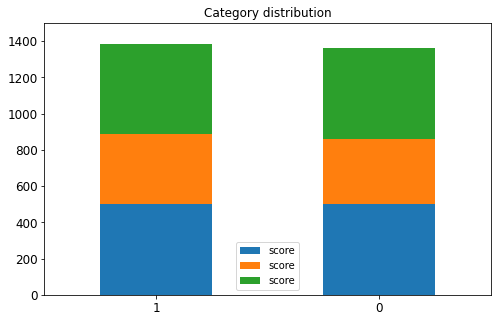

In [45]:
three_dist = pd.concat([df_amazon.score.value_counts(),df_imdb.score.value_counts(),df_yelp.score.value_counts()],axis=1)
three_dist.plot(kind = 'bar', title = 'Category distribution', ylim = [0,1500],rot = 0, fontsize = 12, figsize = (8,5),stacked = True)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df.sentence.to_list()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_tfidf

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
x = df_tfidf
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_result = clf.predict(X_test)
accuracy_score(y_test, y_result)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0],(y_test != y_result).sum()))
print('Percentage:',(y_test != y_result).sum()/ X_test.shape[0])

Number of mislabeled points out of a total 815 points : 144
Percentage: 0.17668711656441718


In [53]:
count_vect = CountVectorizer()
x2 = count_vect.fit_transform(df.sentence).toarray()
y2 = df['score'].values
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3)
clf_2 = GaussianNB()
y_result = clf_2.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_result).sum()))
print('Percentage:',(y_test != y_result).sum()/ X_test.shape[0])

Number of mislabeled points out of a total 815 points : 270
Percentage: 0.3312883435582822


### comment on difference
Comparing this two Classifiers , TF-IDF and Frequency Counts does not have clrear diffenrence. But the precision and recall of TD-IDF is higher than Frequency Counts.By the way,the meaning of sentences is not quite be distingished wherether positive or not, so the effect could be not as expected. 


# Fourth Part:
### In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? 

In my opinion, the Binarization in 5.6 is less meaningful for the new dataset. Because it's binary classification problem, the label only contains 0 or 1. It's not necessary to generate 'bin_category' column which is exactly the same as 'score' column.

### How can you improve the Data preprocessing for these specific datasets? 
The higher frequency term, the fronter it'll be, and remake the term-doc matrices.